<a href="https://colab.research.google.com/github/BorysZhyhalo/DataScience_RobotDreams/blob/main/Lesson10_Classification_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
RANDOM_STATE = 11

Імпортуємо дані:

In [ ]:
data = load_iris()

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Бінарна класифікація

Розглянемо бінарну класифікацію. Для цього створимо новий бінарний таргет:

In [ ]:
y_binary = np.where(y==1, 1, 0)

In [ ]:
y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.unique(y_binary, return_counts=True)

(array([0, 1]), array([100,  50]))

Представників класу "1" вдвічі більше, ніж "0" – незбалансована класифікація.

Зафіксуємо тренувальні та тестові індекси, вказавши, що ми хочемо стратифікувати наші мітки, тобто зберегти однаковий баланс міток у train та test наборах даних:

In [ ]:
train_ids, test_ids = train_test_split(range(len(y_binary)), test_size=.3, random_state=RANDOM_STATE, stratify=y_binary)

Перевіримо, що у нас однаковий відсоток позитивних міток у train і test:

In [ ]:
for dataset_ids in [train_ids, test_ids]:
    print(pd.Series(y_binary[dataset_ids]).value_counts(normalize=True))

0    0.666667
1    0.333333
dtype: float64
0    0.666667
1    0.333333
dtype: float64


Розподіл міток у наборах даних train і test однаковий.

## Навчаємо логістичну регресію

Навчаємо на тренувальних даних:

In [ ]:
clf = LogisticRegression(random_state=RANDOM_STATE)
clf.fit(X[train_ids], y_binary[train_ids])

LogisticRegression(random_state=11)

Знайдемо передбачення. Можемо знайти у вигляді міток класів (метод `predict`), а можемо - у вигляді ймовірності приналежності екземпляра до позитивного класу (метод `predict_proba`). Для початку скористаємося першим методом.

Передбачення знайдемо відразу на всьому наборі даних, а потім фільтруємо за індексами.

In [ ]:
y_pred = clf.predict(X)

In [ ]:
y_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

## Підрахунок метрик

Імпортуємо всі необхідні функції для підрахунку метрик, розберемо їх нижче.

In [ ]:
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)

Знайдемо матрицю невідповідностей (Confusion matrix):

In [ ]:
cm = confusion_matrix(y_binary[test_ids], y_pred[test_ids])
cm

array([[29,  1],
       [11,  4]])

По **вертикалі** у нас значення **справжньої** мітки класу, а по **горизонталі** - **передбаченої**.
Якщо забули - завжди можна знайти підказку у документації методу`confusion_matrix`:
```
Returns
-------
C : ndarray of shape (n_classes, n_classes)
    Confusion matrix whose i-th row and j-th
    column entry indicates the number of
    samples with true label being i-th class
    and predicted label being j-th class.
```

Для відображення матриці візуально скористаємося методом`ConfusionMatrixDisplay`.

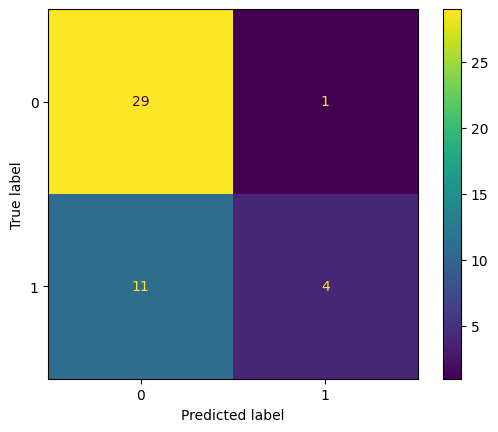

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show();

Метрики знаходимо викликом функцій:

In [ ]:
precision_score(y_binary[train_ids], y_pred[train_ids]).round(3)

0.652

У метрик precision, recall, f1 однаковий інтерфейс, тому можемо задавати метрики списком і підраховувати їх у циклі.

$PRECISION = \frac{TP}{TP + FP}$

$RECALL = \frac{TP}{TP + FN}$

In [ ]:
metrics = [precision_score, recall_score, f1_score]

In [ ]:
for dataset_name, dataset_ids in {'train': train_ids, 'test': test_ids}.items():
    print(dataset_name)
    for metric in metrics:
        print(metric.__name__, metric(y_binary[dataset_ids], y_pred[dataset_ids]).round(3))
    print('\n')

train
precision_score 0.652
recall_score 0.429
f1_score 0.517


test
precision_score 0.8
recall_score 0.267
f1_score 0.4




Також сам класифікатор має `score` - це accuracy.

In [ ]:
clf.score(X, y)

0.4533333333333333

Є можливість вивести кілька метрик однією функцією:

In [ ]:
for dataset_ids in [train_ids, test_ids]:
    print(classification_report(y_binary[dataset_ids], y_pred[dataset_ids]))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        70
           1       0.65      0.43      0.52        35

    accuracy                           0.73       105
   macro avg       0.70      0.66      0.67       105
weighted avg       0.72      0.73      0.72       105

              precision    recall  f1-score   support

           0       0.72      0.97      0.83        30
           1       0.80      0.27      0.40        15

    accuracy                           0.73        45
   macro avg       0.76      0.62      0.61        45
weighted avg       0.75      0.73      0.69        45



Вибір метрики залежить від завдання. Якщо не знаємо, який результат нам більш пріоритетно уникати: хибнопозитивний або хибнонегативний, використовуємо F1.

Тоді в таблиці нас цікавить значення f1-score для класу 1 для тренувальних та тестових даних.

## Поріг класифікації

Якщо хочемо встановити свій поріг визначення класів 1 і 0, то передбачення треба отримувати методом `predict_proba`.

In [ ]:
y_pred_prob = clf.predict_proba(X)

Метод повертає кілька колонок: ймовірність приналежності екземпляра кожному класу.

In [ ]:
y_pred_prob[:5]

array([[0.87062397, 0.12937603],
       [0.70685516, 0.29314484],
       [0.78649679, 0.21350321],
       [0.73016414, 0.26983586],
       [0.89036045, 0.10963955]])

Перевіримо, що у кожному рядку сума 1.

In [ ]:
np.all(y_pred_prob.sum(axis=1)==1)

True

Подивимося, як розподілені передбачені значення. Це може допомогти знайти оптимальний поріг для визначення позитивних і негативних міток.

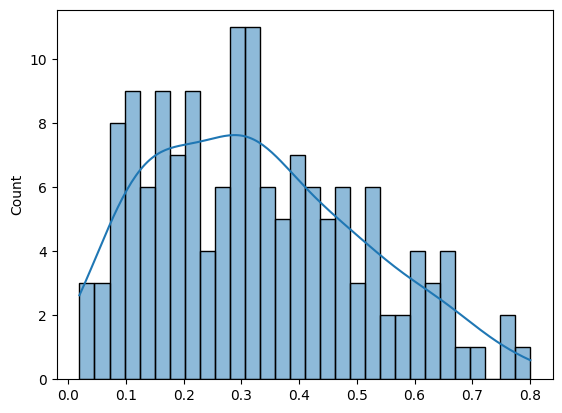

In [ ]:
sns.histplot(y_pred_prob[:,1], bins=30, kde=True);

In [ ]:
THRESHOLD = 0.3

In [ ]:
y_pred = np.where(y_pred_prob[:,1] >= THRESHOLD, 1, 0)

Знайдемо метрики:

In [ ]:
for dataset_ids in [train_ids, test_ids]:
    print(classification_report(y_binary[dataset_ids], y_pred[dataset_ids]))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77        70
           1       0.57      0.91      0.70        35

    accuracy                           0.74       105
   macro avg       0.76      0.79      0.74       105
weighted avg       0.82      0.74      0.75       105

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.50      0.73      0.59        15

    accuracy                           0.67        45
   macro avg       0.66      0.68      0.66        45
weighted avg       0.72      0.67      0.68        45



Значення f1-score для класу 1 і для тренувальних, і для тестових даних покращилося, отже ми вибрали вдалий поріг класифікації у випадку, якщо нам важливіше вірно класифікувати саме клас 1

### ROC curve

Для позитивного класу знайдемо ROC криву та площу під нею.

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_binary[test_ids], y_pred_prob[test_ids][:, 1])
roc_auc = auc(fpr, tpr)

In [ ]:
def plot_roc(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2 # linewidth - ширина линии на графике
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

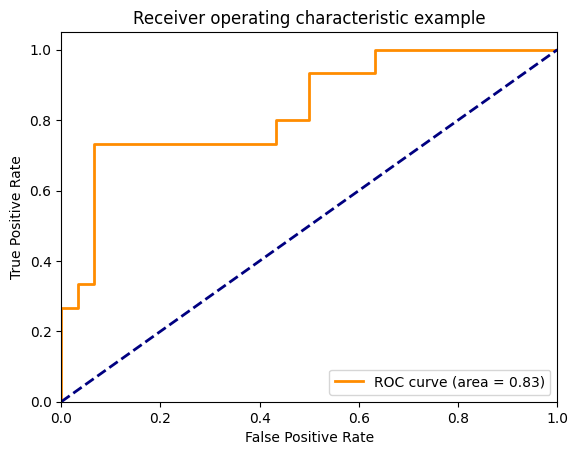

In [ ]:
plot_roc(fpr, tpr, roc_auc)

## Мультикласова класифікація

Використовуємо оригінальний таргет та побудуємо мультикласову класифікацію.

In [ ]:
clf = LogisticRegression(random_state=RANDOM_STATE, multi_class='ovr')
clf.fit(X[train_ids], y[train_ids])

LogisticRegression(multi_class='ovr', random_state=11)

In [ ]:
y_pred = clf.predict(X)
y_pred_prob = clf.predict_proba(X)
score = clf.score(X, y)

Виведемо класифікаційний звіт:

In [ ]:
for dataset_ids in [train_ids, test_ids]:
    print(classification_report(y[dataset_ids], y_pred[dataset_ids]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      0.89      0.91        35
           2       0.89      0.94      0.92        36

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



Можемо також за підрахунком окремих метрик (precision, recall, f1) задавати бажане усереднення.

In [ ]:
precision_score(y[test_ids], y_pred[test_ids], average='macro')

0.9583333333333334

In [ ]:
precision_score(y[test_ids], y_pred[test_ids], average='micro')

0.9555555555555556